In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
# nécessaires pour la réalisation d'une ACP 
from sklearn import preprocessing
from sklearn import decomposition

#from sklearn.preprocessing import OrdinalEncoder

import graphviz


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1.Première vue du Dataset utilisé

In [2]:
kentucky_data=pd.read_csv('fastfood.csv')
kentucky_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB


In [3]:
kentucky_data.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [4]:
kentucky_data.isnull().sum()

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

In [5]:
kentucky_data.describe()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,503.000000,515.000000,514.000000,301.000000,305.000000,305.000000
mean,530.912621,238.813592,26.590291,8.153398,0.465049,72.456311,1246.737864,45.664078,4.137177,7.262136,27.891051,18.857143,20.170492,24.852459
std,282.436147,166.407510,18.411876,6.418811,0.839644,63.160406,689.954278,24.883342,3.037460,6.761301,17.683921,31.384330,30.592243,25.522073
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,330.000000,120.000000,14.000000,4.000000,0.000000,35.000000,800.000000,28.500000,2.000000,3.000000,16.000000,4.000000,4.000000,8.000000
50%,490.000000,210.000000,23.000000,7.000000,0.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,24.500000,10.000000,10.000000,20.000000
75%,690.000000,310.000000,35.000000,11.000000,1.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000,20.000000,30.000000,30.000000
max,2430.000000,1270.000000,141.000000,47.000000,8.000000,805.000000,6080.000000,156.000000,17.000000,87.000000,186.000000,180.000000,400.000000,290.000000


Vu le nombre de données nulles sur les colonnes vit_a vit_c et calcium, on décide de ne pas prendre en compte ces colonnes dans notre analyse

In [6]:
kentucky_filtered=['calories','cal_fat','total_fat','sat_fat','trans_fat','cholesterol','sodium','total_carb','fiber','sugar','protein']
kentucky_data_clean=kentucky_data[kentucky_filtered].dropna(axis=0).reset_index(drop=True)

## 1.1 Visualisation 

<Axes: xlabel='calories', ylabel='restaurant'>

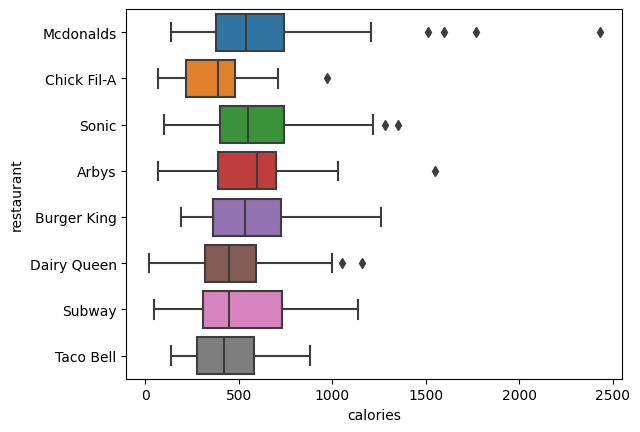

In [7]:
#on observe la distribution de la variable 'total_fat' par restaurant
sns.boxplot(x=kentucky_data_clean['calories'],y=kentucky_data['restaurant'])

<Axes: title={'center': 'Calories/TotalFat'}, xlabel='total_fat', ylabel='calories'>

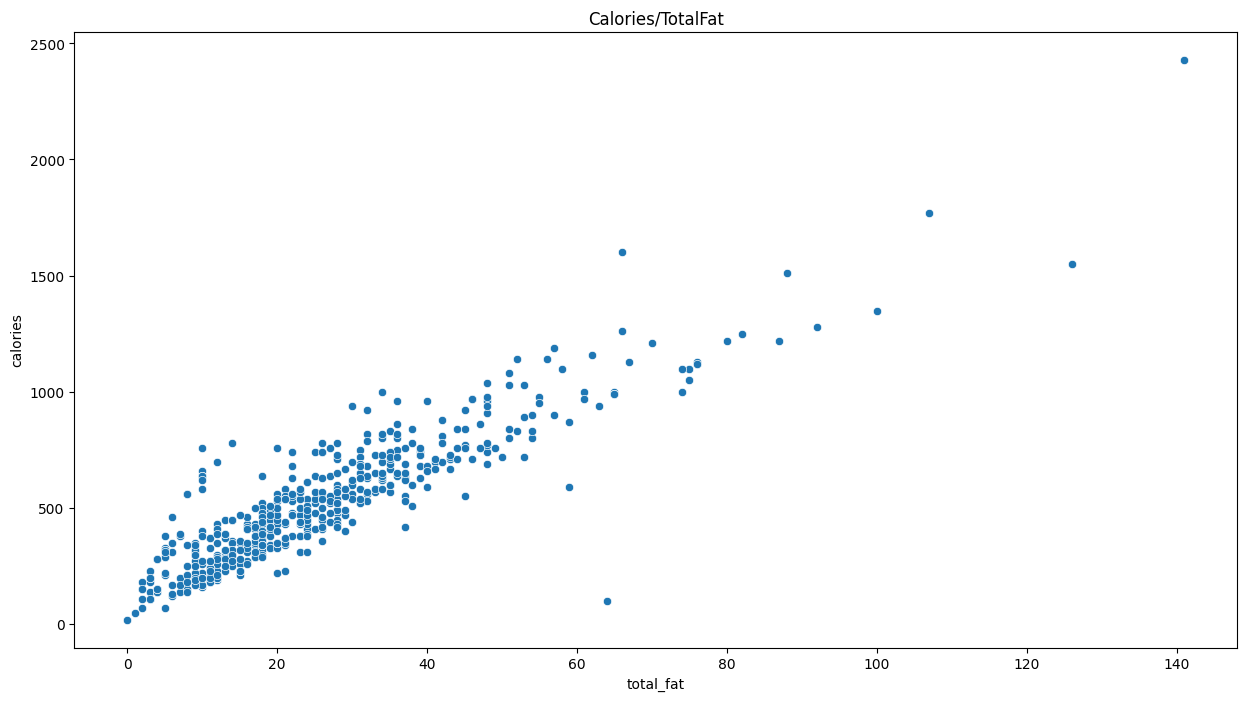

In [8]:
# On s'interesse maintenant à la corrélation entre la quantité de graisse contenue dans un aliment 'total_fat' et les calories de celui-ci 
plt.figure(figsize=(15,8))
plt.title("Calories/TotalFat")
sns.scatterplot(y=kentucky_data['calories'],x=kentucky_data['total_fat'])

A partir de ce graphique on peut faire l'hypothèse d'un corrélation entre 'total_fat' et 'calories', ce qui parait logique <br>
Cependant existe-t-il une correlation entre le nombre de calories et d'autres nutriments ?  Et lesquels sont les plus pertinents pour construire un modèle prévisionnel ? 

# 2 Objectif : prédire le nombre de calories 

## 2.1 Réalisation d'une ACP 

In [9]:
# Réalisation d'une ACP ( mooc open classroom : https://openclassrooms.com/fr/courses/4379436-explorez-vos-donnees-avec-des-algorithmes-non-supervises)
#standardisation/preprocess
std_scale = preprocessing.StandardScaler().fit(kentucky_data_clean)
kentucky_data_clean_scaled = std_scale.transform(kentucky_data_clean)

In [10]:
#On choisit ici 2 composantes
pca = decomposition.PCA(n_components=2)
pca.fit(kentucky_data_clean_scaled)

PCA(n_components=2)

In [11]:
# On affiche le pourcentage de variance expliquée par chacune des composantes ainsi que la somme des 2 
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.59347963 0.18513064]
0.7786102749786505


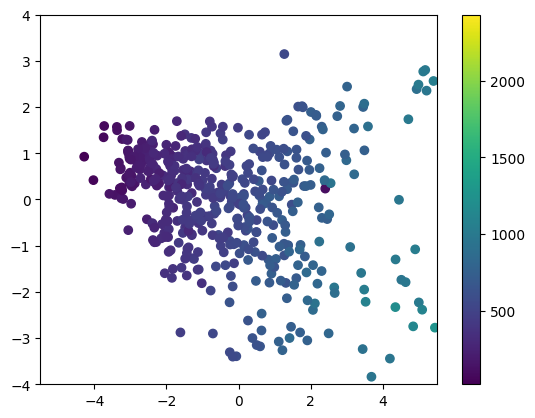

In [12]:
# projeter X sur les composantes principales
X_projected = pca.transform(kentucky_data_clean_scaled)

# afficher chaque observation
plt.scatter(X_projected[:, 0], X_projected[:, 1],
    # colorer en utilisant la variable 'calories'
    c=kentucky_data_clean.calories)

plt.xlim([-5.5, 5.5])
plt.ylim([-4, 4])
plt.colorbar()

### 2.1.1 Réalisation d'un cercle de corrélation

(-0.7, 0.7)

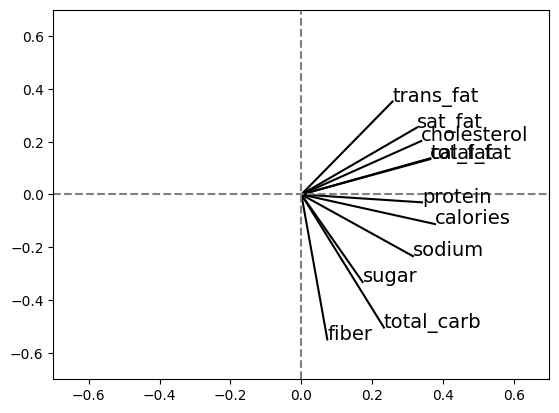

In [13]:

pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, kentucky_data_clean.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

 On observe que les éléments de graisses sont très corrélées  entre elles, que les proteines et le sodium sont les 2 composantes les plus corrélées aux calories

## 2.2 Calcul de coefficients de  corrélation linéaire 

 Sans cercle de correlation, on peut s'interesser aux corrélations de la variable 'calories' en calculant le coeff de correlation linéaire


In [14]:
print('(Statistic, p-value)')
for col in kentucky_data_clean:
    print(col)
    print(stats.pearsonr(kentucky_data_clean[col],kentucky_data_clean['calories']))

(Statistic, p-value)
calories
PearsonRResult(statistic=0.9999999999999998, pvalue=0.0)
cal_fat
PearsonRResult(statistic=0.8986715808097981, pvalue=1.9291585349572536e-181)
total_fat
PearsonRResult(statistic=0.8974644710423189, pvalue=3.199706560730599e-180)
sat_fat
PearsonRResult(statistic=0.7284118838730362, pvalue=2.593865682232167e-84)
trans_fat
PearsonRResult(statistic=0.5177450341293176, pvalue=7.699845763704373e-36)
cholesterol
PearsonRResult(statistic=0.7549276193119986, pvalue=7.558253777253639e-94)
sodium
PearsonRResult(statistic=0.8215374785859872, pvalue=2.4492820796334644e-124)
total_carb
PearsonRResult(statistic=0.7179097405519291, pvalue=7.668825733584244e-81)
fiber
PearsonRResult(statistic=0.2870313838263437, pvalue=5.382151701582958e-11)
sugar
PearsonRResult(statistic=0.4342691049632716, pvalue=1.4967937480580257e-24)
protein
PearsonRResult(statistic=0.8311056197443834, pvalue=9.100715168925993e-130)


On peut alors définir la corrélation de certains nutriments et déterminer lesquels seront les plus pertinents pour construire un modèle prévisonnel 

##  2.3 Modèles

In [15]:
# Creating features , on gardera celle dont le coeff de Pearson est supérieur à 0.75
features = ["cal_fat","total_fat","cholesterol","protein"]
X = kentucky_data_clean[features]

In [16]:
# target
y = kentucky_data_clean.calories

In [17]:
# Split into validation and training data, on garde 80 % de données pour l'entrainement et 20 % pour les tests 
train_X, valid_X, train_y, valid_y = train_test_split(X, y,train_size=0.8,test_size=0.2, random_state=0)

Bien que la régression linéaire semble être tout indiquée pour ce genre de problème, on testera ici 3 modèles supervisés : <br>
 La régression linéaire <br>
 Arbre de décision <br>
 Le random Forest <br>

###  2.3.1 Régression Linéaire

In [18]:
# On effectue une régression linéaire
kentucky_model_regr = linear_model.LinearRegression()
kentucky_model_regr.fit(train_X, train_y)
pred_regr= kentucky_model_regr.predict(valid_X)
print('Calories prédites par régression linéaire')
print(kentucky_model_regr.predict(valid_X.head()))

Calories prédites par régression linéaire
[ 629.37309928 1163.03800924  440.54620714  493.87421899  349.02847162]


###  2.3.2 Decision Tree Regressor

In [19]:
kentucky_model_tree= DecisionTreeRegressor(random_state=0)
kentucky_model_tree.fit(train_X,train_y)
pred_tree = kentucky_model_tree.predict(valid_X)

print('Predictions ces 5 aliments:')
print(X.head())
print('Calories prédites par DecisionTree :')
print(kentucky_model_tree.predict(valid_X.head()))

Predictions ces 5 aliments:
   cal_fat  total_fat  cholesterol  protein
0       60          7           95     37.0
1      410         45          130     46.0
2      600         67          220     70.0
3      280         31          155     55.0
4      410         45          120     46.0
Calories prédites par DecisionTree :
[ 640. 1130.  370.  550.  410.]


[Text(0.6627395135208853, 0.9705882352941176, 'x[1] <= 29.5\nsquared_error = 78188.013\nsamples = 402\nvalue = 518.408'),
 Text(0.39653186370012466, 0.9117647058823529, 'x[3] <= 23.5\nsquared_error = 22900.124\nsamples = 271\nvalue = 382.694'),
 Text(0.187760579021197, 0.8529411764705882, 'x[0] <= 145.0\nsquared_error = 12767.238\nsamples = 182\nvalue = 317.473'),
 Text(0.06442390118453865, 0.7941176470588235, 'x[0] <= 32.5\nsquared_error = 8329.258\nsamples = 102\nvalue = 253.725'),
 Text(0.017144638403990026, 0.7352941176470589, 'x[0] <= 19.0\nsquared_error = 4001.384\nsamples = 17\nvalue = 144.706'),
 Text(0.004987531172069825, 0.6764705882352942, 'x[3] <= 2.0\nsquared_error = 422.222\nsamples = 3\nvalue = 46.667'),
 Text(0.0024937655860349127, 0.6176470588235294, 'squared_error = 0.0\nsamples = 1\nvalue = 20.0'),
 Text(0.007481296758104738, 0.6176470588235294, 'x[3] <= 8.0\nsquared_error = 100.0\nsamples = 2\nvalue = 60.0'),
 Text(0.004987531172069825, 0.5588235294117647, 'squared_

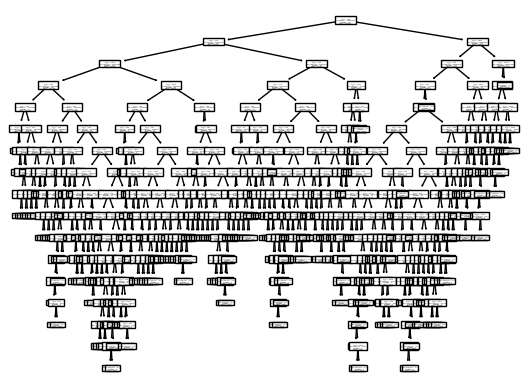

In [20]:
#Visualisation de l'arbre
tree.plot_tree(kentucky_model_tree.fit(train_X,train_y))
# scroll down pour voir l'arbre  

###  2.3.3 Random Forest 

In [22]:
kentucky_model_forest = RandomForestRegressor(random_state=1)
kentucky_model_forest.fit(train_X, train_y)
pred_forest = kentucky_model_forest.predict(valid_X)
print(kentucky_model_forest.predict(valid_X.head()))

[ 621.4 1156.   465.3  511.5  358.1]


## 2.4 Bilans des résultats obtenus 

In [23]:
#Comparaison des résultats ( aperçu de la head)
print('Calories prédites par DecisionTree :')
print(kentucky_model_tree.predict(valid_X.head()))
print('Calories prédites par régression linéaire')
print(kentucky_model_regr.predict(valid_X.head()))
print('Calories prédites par Random forest')
print(kentucky_model_forest.predict(valid_X.head()))
print('Calories du set de validation')
print(valid_y.head())

Calories prédites par DecisionTree :
[ 640. 1130.  370.  550.  410.]
Calories prédites par régression linéaire
[ 629.37309928 1163.03800924  440.54620714  493.87421899  349.02847162]
Calories prédites par Random forest
[ 621.4 1156.   465.3  511.5  358.1]
Calories du set de validation
90      640
97     1120
475     540
340     470
395     420
Name: calories, dtype: int64
